# 1. Load the Dataset 

In [1]:
# ⚠️ Dataset not included in GitHub due to size (>100MB)
# Download manually from:
# https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
# and place it in the `data/` folder


# USA Real Estate Project – Load from CSV
import pandas as pd

# Load the CSV
df = pd.read_csv("../data/usa_housing.csv")

# Preview
df.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


# 2. Explore the Dataset Structure and Quality

In [2]:
# Basic overview
print(df.info())

# Summary stats
print(df.describe())

# Missing values?
print(df.isnull().sum())

# Percent of missing values
print((df.isnull().mean() * 100).sort_values(ascending=False))

# Any duplicates?
print(df.duplicated().sum())

# Columns
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
None
        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.6500

# 3. Clean and Prepare the Data

In [3]:
# Drop only 'prev_sold_date' for now
df.drop(columns=['prev_sold_date'], inplace=True)

# Fill numeric columns with median
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['house_size'] = df['house_size'].fillna(df['house_size'].median())

# Fill other missing values
df['city'] = df['city'].fillna("Unknown")
df['state'] = df['state'].fillna("Unknown")
df['zip_code'] = df['zip_code'].fillna("Unknown")
df['street'] = df['street'].fillna("Unknown")
df['brokered_by'] = df['brokered_by'].fillna("Not Provided")


# Drop rows with missing price (only 1,541 rows out of 2.2 million)
df.dropna(subset=['price'], inplace=True)

# Fill 'acre_lot' with median
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].median())

# Fix data types (zip_code should be string, not float)
df['zip_code'] = df['zip_code'].astype(str)

# Clean column names (lowercase, underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Final check
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2224841 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   brokered_by  object 
 1   status       object 
 2   price        float64
 3   bed          float64
 4   bath         float64
 5   acre_lot     float64
 6   street       object 
 7   city         object 
 8   state        object 
 9   zip_code     object 
 10  house_size   float64
dtypes: float64(5), object(6)
memory usage: 203.7+ MB
brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
street         0
city           0
state          0
zip_code       0
house_size     0
dtype: int64


# 4. Exploratory Data Analysis (EDA) – Visualizing Key Insights

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


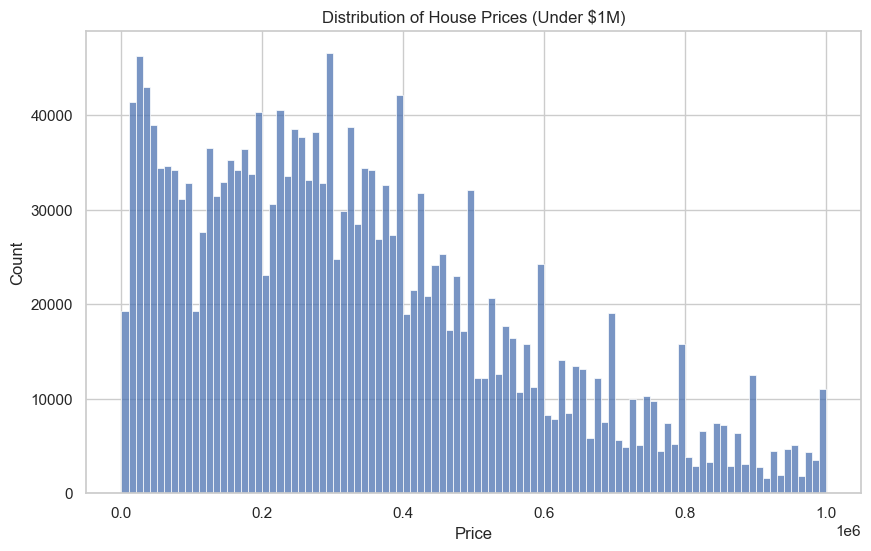

In [5]:

# 4.1. Distribution of House Prices under 1 million $

plt.figure(figsize=(10, 6))
sns.histplot(df['price'][df['price'] < 1_000_000], bins=100)
plt.title('Distribution of House Prices (Under $1M)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


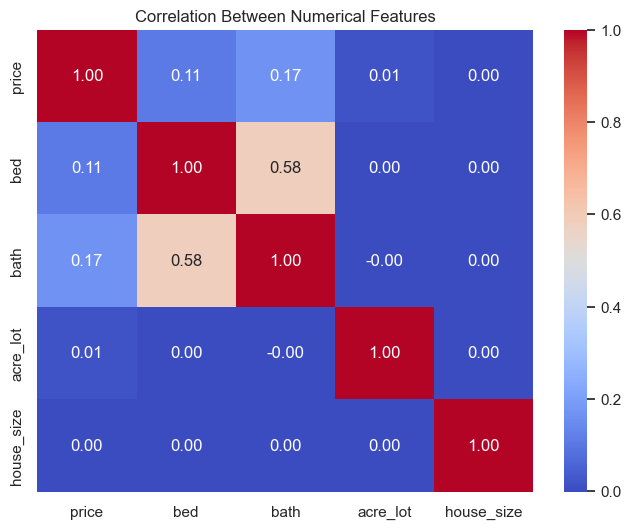

In [6]:
# 4.2. Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()




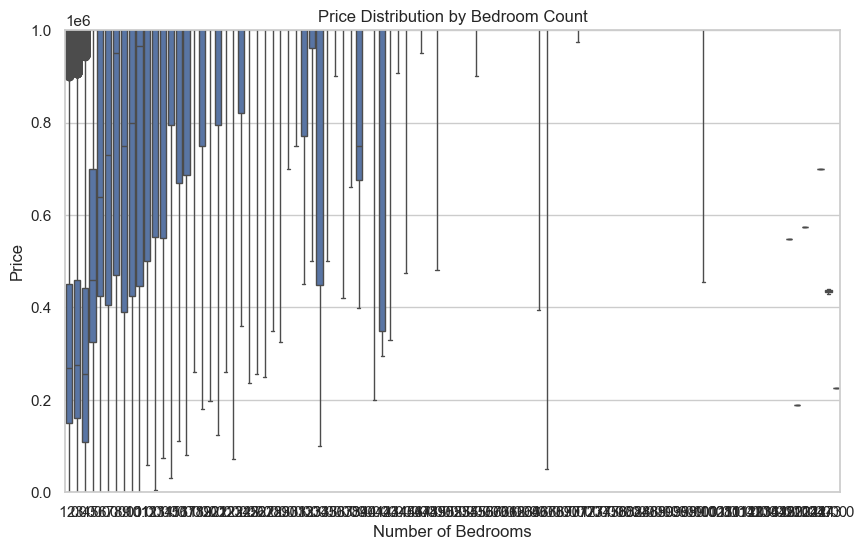

In [7]:
# 4.3. Price by Number of Bedrooms

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bed', y='price')
plt.title('Price Distribution by Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ylim(0, 1_000_000)
plt.show()

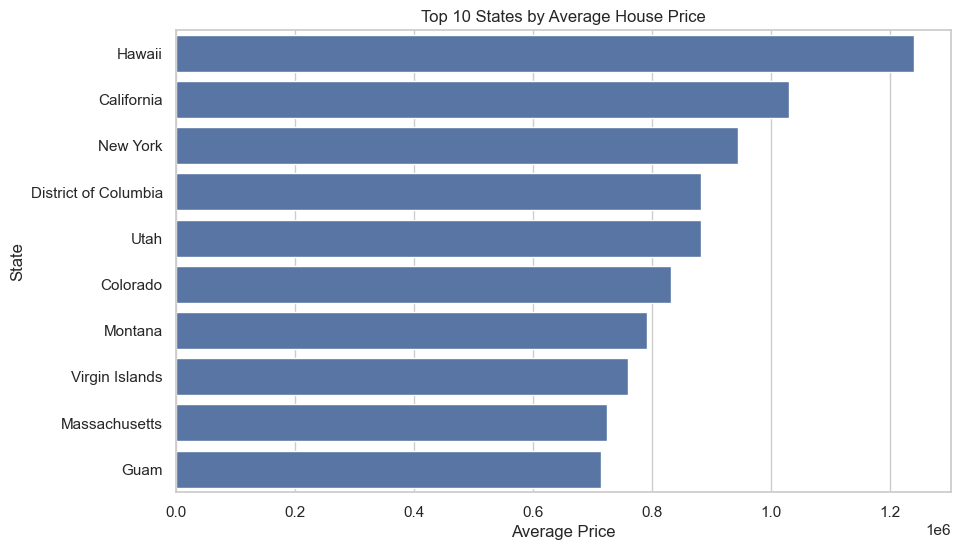

In [8]:
# 4.4. Top 10 States by Average Price

top_states = df.groupby('state')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 States by Average House Price')
plt.xlabel('Average Price')
plt.ylabel('State')
plt.show()

# 5. Answering Key Business Questions

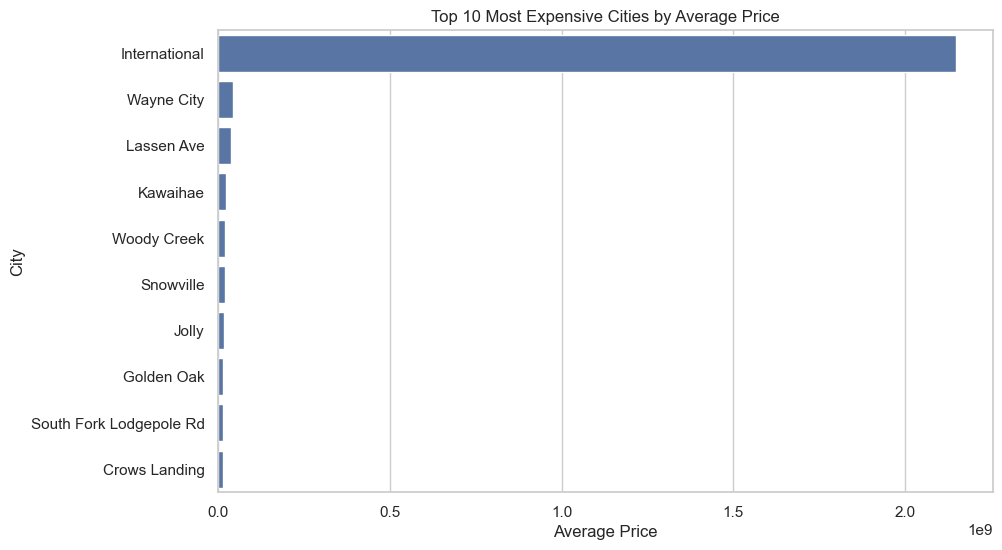

In [9]:
# 5.1. What are the Top 10 Most Expensive Cities (Average Price)?

top_cities = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Most Expensive Cities by Average Price')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show()


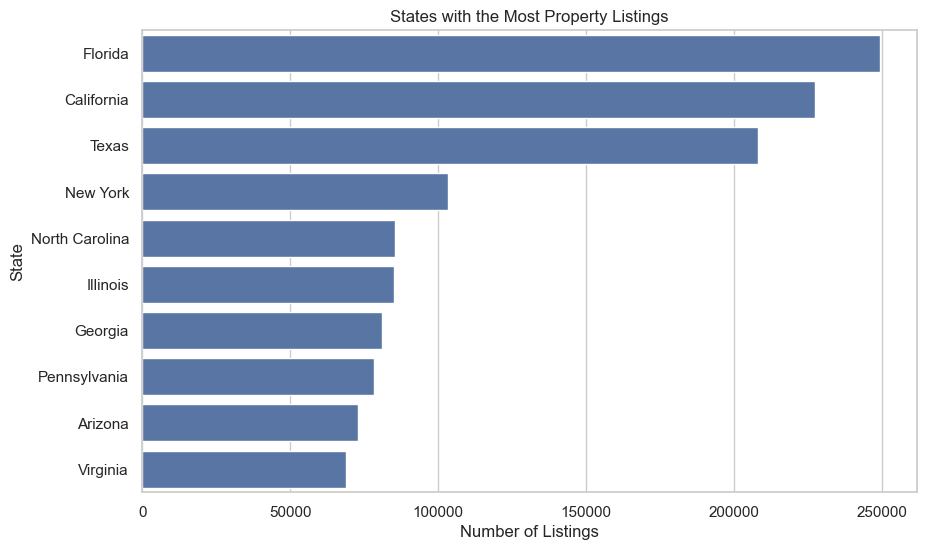

In [10]:
# 5.2. Which States Have the Most Listings?
top_listing_states = df['state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_listing_states.values, y=top_listing_states.index)
plt.title('States with the Most Property Listings')
plt.xlabel('Number of Listings')
plt.ylabel('State')
plt.show()


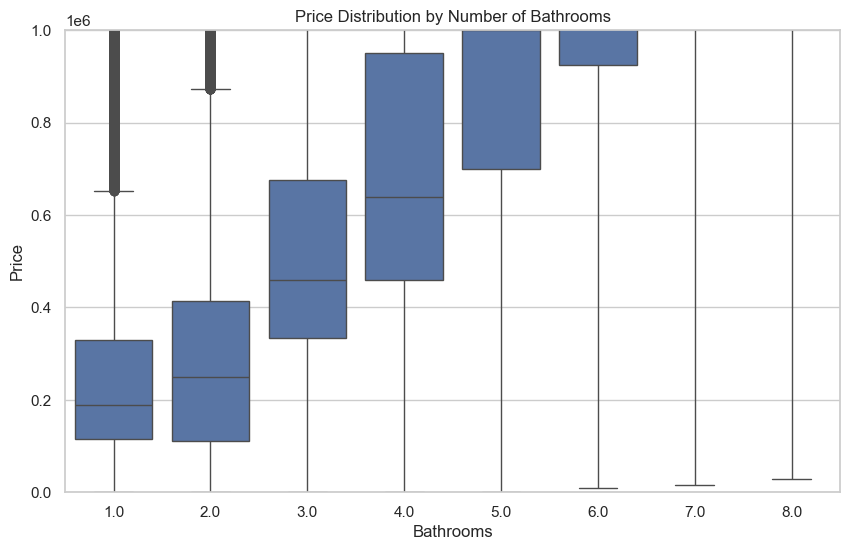

In [11]:
# 5.3. Does Price Increase with Number of Bathrooms?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['bath'] <= 8], x='bath', y='price')
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.ylim(0, 1_000_000)
plt.show()
